# Problem 1:
Set random seed = 42. Generate a sample of 200 observations of the following random variables: <br>
$X = 2 + u$, where $u$ is the random number in the range (0,2). <br>
$Z = 3 - e$, where $e$ is the random number in the range (0,3). <br>
$Y = 5 + 2X + Z + o$, where $o$ is the random noise in the range (0,1). <br>
Estimate the model: $Y = 5 + 2X + Z + o$


In [1]:
import numpy as np
np.random.seed(42)
#Generate random numbers between 0 and 1. 
X = 2 + 2 * np.random.rand(200, 1)
Z = 3 - 3 * np.random.rand(200, 1)
Y = 5 + 2 * X + Z + np.random.randn(200, 1)

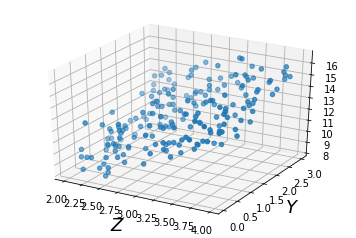

In [9]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X,Z,Y, cmap='Greens')
plt.xlabel("$X$", fontsize=18)
plt.xlabel("$Z$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.show()

In [10]:
X_b = np.c_[np.ones((200, 1)),X,Z]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best 

array([[4.89188398],
       [2.00491005],
       [1.06010372]])

In [14]:
# Extereme value of X
X_new = np.array([[2],[4],[6]]) 
Z_new = np.array([[8],[10],[12]])
X_new_b = np.c_[np.ones((3, 1)), X_new,Z_new]  # add x0 = 1 to each instance two points define a line 
# Extreme value for y, knowing both bounds of X and Y will allow us to draw a line between them.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[17.38253385],
       [23.5125614 ],
       [29.64258894]])

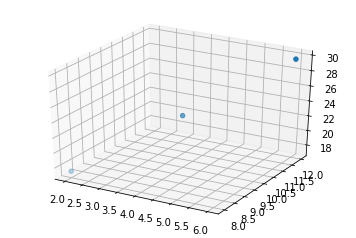

In [17]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_new,Z_new,y_predict, cmap='Reds')

# Problem 2: 
Estimate the model from problem 1 Batch Gradient Descent (BGD) with eta = 0.1, 1000 iterations, and 200 observations. What do you think is the problem? Is MSE is getting smaller or bigger with each iteration?

In [31]:
from sklearn.metrics import mean_squared_error
np.random.seed(42)
# set step at 0.1
eta = 0.1
# number of steps
n_iterations = 1000
# number of observations
m = 200
# randomly set the starting point
theta = np.random.randn(3,1)
# Walk 1000 steps. 
errors=[]
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients
    y_predict_bgd = X_b.dot(theta)
    errors.append(mean_squared_error(Y, y_predict_bgd))

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


In [32]:
theta

array([[-8.02330978e+171],
       [-2.45100361e+172],
       [-1.27453710e+172]])

Text(0,0.5,'MSE')

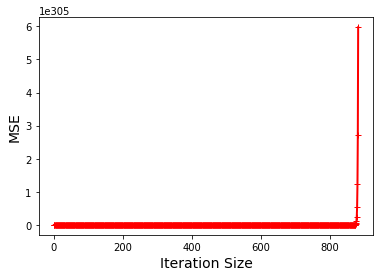

In [33]:
plt.plot(errors, "r-+", linewidth=2, label="MSE")
plt.xlabel("Iteration Size", fontsize=14) 
plt.ylabel("MSE", fontsize=14)              

In [54]:
# The problem is overfiting, according to the large parameters. The model considers too much about the noises. 
# MSE is getting larger.

The fit is getting worse as we iterate.

# Problem 3 
Let's try two ways to fix the problem. <br>
3.A Find smaller eta to reduce MSE. Search from 0.001 to 0.1, using a step of 0.001. What is the optimal eta? What is the MSE with the optimal eta? Plot the graph of eta and MSE around the optimal eta (+20,-20 observations). 


In [47]:
n_iterations = 1000
m = 200
theta = np.random.randn(3,1)
eta_best = 0.001
MSE_best = float('inf')
MSEs=[]
etas = np.linspace(0.001,0.1,100)
for eta in etas: 
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        theta = theta - eta * gradients
        y_predict_bgd = X_b.dot(theta)
        # Check if there is NaN/inf in y_pred
    if np.sum(np.isnan(y_predict_bgd)):
        MSE = float('inf')
    else:
        MSE = mean_squared_error(Y, y_predict_bgd)
    MSEs.append(MSE)
    # Check if current eta is optimal
    if MSE < MSE_best:
        MSE_best = MSE
        eta_best = eta

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


In [43]:
MSE_best

0.9680638834948752

In [44]:
eta_best

0.031

[0.011, 0.051, 0.96775, 0.96825]

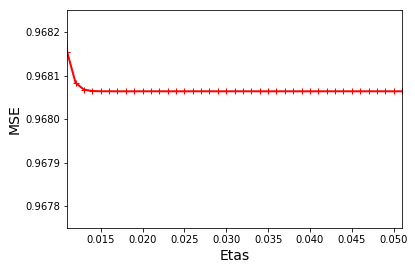

In [56]:
plt.plot(etas,MSEs, "r-+", linewidth=2)
plt.xlabel("Etas", fontsize=14) 
plt.ylabel("MSE", fontsize=14)  
plt.axis([0.011,0.051,0.96775,0.96825])   

# Problem 4:
Let's try to fix the model fit in Problem 2 by using optimal early stopping. At what iteration should we stop to minimize MSE? What is the value of MSE at this step? Compare our MSE with the one from Problem 3.  

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X_concat = np.c_[X,Z] 
lin_reg.fit(X_concat, Y)
lin_reg.intercept_, lin_reg.coef_

(array([4.89188398]), array([[2.00491005, 1.06010372]]))

In [58]:
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # Split data into test and train
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
    # create vectors to save errors
    train_errors, val_errors = [], []
    n_iterations = 1000
    # loop through all observations adding one at a time
    for iteration in range(n_iterations):
        # fit the model
        model.fit(X_train, y_train)
        # predict y on training
        y_train_predict = model.predict(X_train)
        # predict on validation
        y_val_predict = model.predict(X_val)
        # calculate training and validation errors
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Iteration size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

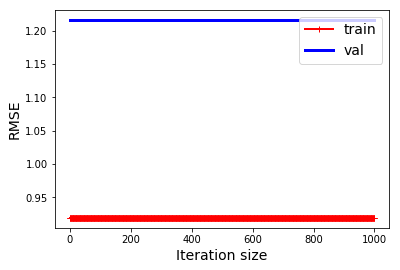

In [62]:
plot_learning_curves(lin_reg, X_concat, Y)                       
plt.show() 

In [63]:
MSEs[0]

1.3154610607435229

In [ ]:
# As there is a flat line of iteration size and RMSE, so we stop at the first iteraiton. 
# At this point, the MSE is 1.3154610607435229, bigger than the optimal MMSE.

Early stopping shows that we need to stop at the first iteration. Our model is very bad. The MSE in problem 4 is much higher than the MSE in the problem 3, when we could choose an optimal eta.

# Problem 5:

To solve this problem we need to learn how to time the how long it takes to run our code:

In [77]:
np.random.seed(42)
#Generate random numbers between 0 and 1. 
X1 = 2 + 2 * np.random.rand(1000000, 1)
Z1 = 3 - 3 * np.random.rand(1000000, 1)
Y1 = 5 + 2 * X1 + Z1 + np.random.randn(1000000, 1)
X_b1 = np.c_[np.ones((1000000, 1)),X1,Z1]
X_concat1 = np.c_[X1,Z1]

Create create Y, X, and Z samples from problem 1 with 1,000,000 observations (million). Measure how long does it take to estimate linear regression of Y on X and Z using: Stochastic Gradient Descent, Batch Gradient Descent, Linear Regression from sklearn, and Linear regression estimated using matrix multiplication $$\hat{\theta} = (\pmb{X}^T \cdot \pmb{X})^{-1} \cdot \pmb{X}^T \cdot \pmb{y}$$, and Linear regression estimated preudo-inverse. For Batch Gradient Descent use 1000 iterations and eta = 0.01. For Stochastic Gradient Descent use 50 iterations and eta = 0.01. Use SGDRegressior imported from sklearn.model.

In [65]:
from sklearn.linear_model import SGDRegressor

In [66]:
def SGD(X,Y):
    sgd_reg = SGDRegressor(max_iter=50, penalty=None,  eta0 = 0.01,  random_state=42)
    sgd_reg.fit(X, Y.ravel())
    return sgd_reg.intercept_, sgd_reg.coef_

In [79]:
def BGD(X,Y):
    eta = 0.01
    n_iterations = 1000
    theta = np.random.randn(3,1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b1.T.dot(X_b1.dot(theta) - Y)
        theta = theta - eta * gradients
    return theta

In [68]:
def Lin(X,Y):
    lin_reg = LinearRegression()
    lin_reg.fit(X, Y)
    return lin_reg.intercept_, lin_reg.coef_

In [69]:
def LinMatrix(X,Y):
    theta_best = np.linalg.inv(X_b1.T.dot(X_b)).dot(X_b1.T).dot(Y)
    return theta_best 

In [70]:
def Preudo_inverse(Y):
    np.linalg.pinv(X_b1).dot(Y)

In [71]:
import time

In [78]:
t_SGD = time.time()
SGD(X_concat1,Y1)
print(time.time() - t_SGD)

6.369924783706665


In [80]:
import sys
t_BGD = time.time()
BGD(X_concat1,Y1)
print(time.time() - t_BGD)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


8.66420292854309


In [81]:
t_Lin = time.time()
Lin(X_concat1,Y1)
print(time.time() - t_Lin)

0.07956194877624512


In [82]:
t_LinMatrix = time.time()
Lin(X_concat1,Y1)
print(time.time() - t_LinMatrix)

0.0672149658203125


In [83]:
t_Preudo_inverse = time.time()
Preudo_inverse(Y1)
print(time.time() - t_Preudo_inverse)

0.10244464874267578


# Problem 6
Recreate a X,Y data from problem 1 using 200 observations. Create a 20-degree polynomial for X and scale the data using standard scaler. Estimate the regression model predicting Y via Ridge regression. Calculate MSE (average 'neg_mean_squared_error') using cross-validation with cv = 3. Find optimal alpha by looping from 0.0001 to 1 using step size 0.0001.

In [84]:
np.random.seed(42)
#Generate random numbers between 0 and 1. 
X2 = 2 + 2 * np.random.rand(200, 1)
Z2 = 3 - 3 * np.random.rand(200, 1)
Y2 = 5 + 2 * X2 + Z2 + np.random.randn(200, 1)
X_b2 = np.c_[np.ones((200, 1)),X2,Z2]
X_concat2 = np.c_[X2,Z2]

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

polybig_features = PolynomialFeatures(degree=20, include_bias=False)
std_scaler = StandardScaler()
scores=[]
alphas = np.linspace(0.0001,1,10000)
for i in alphas:
    clf = Ridge(alpha=i)
    clf.fit(X_concat2, Y2) 
    Y_predict_new = clf.predict(X_concat2)
    Ridge_reg = Ridge(random_state=42)
    NMSE = cross_val_score(Ridge_reg,Y2,Y_predict_new,scoring="neg_mean_squared_error", cv=3)
    scores.append(np.mean(NMSE))

In [86]:
scores.index(min(scores)) # so alpha=0.0001 is the optimal choice 

0

# Problem 7: 
Repeat the problem 6 using Lasso regression. In addition to MSE and alpha, report how many coefficients are equal to zero in the optimal model.    

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

polybig_features = PolynomialFeatures(degree=20, include_bias=False)
std_scaler = StandardScaler()
scores=[]
alphas = np.linspace(0.0001,1,10000)
for i in alphas:
    clf = Lasso(alpha=i)
    clf.fit(X_concat2, Y2) 
    Y_predict_newl = clf.predict(X_concat2)
    Lasso_reg = Lasso(random_state=42)
    NMSE = cross_val_score(Lasso_reg,Y2,Y_predict_newl,scoring="neg_mean_squared_error", cv=3)
    scores.append(np.mean(NMSE))

In [139]:
scores.index(min(scores)) #so alpha=0.0001 is the optimal choice 

0

In [89]:
clf = Lasso(alpha=0.0001)
clf.fit(X_concat2, Y2) 
clf.coef_   # so there is only one coeficient. namely (n+d)!/d!n! = 231, 229 coefficients are zeros. 

array([2.00462615, 1.05997877])